#**Fine Tuning using Xception**
###Gayanthika Shankar
###School of Computing and Data Science
###gayanthika.s-26@scds.saiuniversity.edu.in

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline


2.17.1


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
#Load the pre-processed dataset form drive

from numpy import load

X_train_std = load('/content/gdrive/MyDrive/DL/X_train_std.npy')
X_test_std = load('/content/gdrive/MyDrive/DL/X_test_std.npy')

y_train = load('/content/gdrive/MyDrive/DL/y_train.npy')
y_test = load('/content/gdrive/MyDrive/DL/y_test.npy')


In [4]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))

X_train_std_shape: (1245, 299, 299, 3)
X_test_std_shape: (416, 299, 299, 3)


##Load the TL model

In [5]:
#Best saved

model1_FT = keras.models.load_model('/content/gdrive/MyDrive/DL/Xception_Best_Model_TL.h5')

In [6]:
model1_FT.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,875,821 (79.63 MB)

 Trainable params: 20,817,195 (79.41 MB)

 Non-trainable params: 58,624 (229.00 KB)

 Optimizer params: 2 (12.00 B)

##Fine tuning:
###Settings initial 25% layers (of the feature extractor) as non-trainable (not updated during backpropogation) and the remaining as trainable

In [7]:
train_threshold = int(0.25*(len(model1_FT.layers)-4)) #last 4 layers belong to the classifier

for layer in model1_FT.layers[:train_threshold]:
    layer.trainable = False

for layer in model1_FT.layers[train_threshold:]:
    layer.trainable = True

##Compile and train the model
###Save the best waits during training

In [8]:

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

model1_FT.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])


#Use the same data augmentation setup we used for transfer learning
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

#Create generators
train_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=16,
    subset='training'
)

validation_generator = datagen.flow(
    X_train_std,
    y_train,
    batch_size=16,
    subset='validation'
)

callbacks1_FT = [
    keras.callbacks.ModelCheckpoint(
        "best_xception_FT.weights.h5",
        monitor='val_accuracy',
        save_weights_only=True,
        save_best_only=True
    ),
]

#Train
history1_FT = model1_FT.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=callbacks1_FT
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


71/71 ━━━━━━━━━━━━━━━━━━━━ 85s 636ms/step - accuracy: 0.9523 - loss: 0.2152 - val_accuracy: 0.8226 - val_loss: 2.0339
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.9854 - loss: 0.0503 - val_accuracy: 0.9597 - val_loss: 0.1830
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 313ms/step - accuracy: 0.9683 - loss: 0.1058 - val_accuracy: 0.9597 - val_loss: 0.1756
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.9912 - loss: 0.0149 - val_accuracy: 0.9919 - val_loss: 0.0164
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 299ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.9839 - val_loss: 0.0879
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 300ms/step - accuracy: 0.9876 - loss: 0.0378 - val_accuracy: 0.9597 - val_loss: 0.5140
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 306ms/step - accuracy: 0.9860 - loss: 0.0698 - val_accuracy: 0.9113 - val_loss: 0.3049
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 301ms/step - accuracy: 0.9888 - loss: 0.0527 - val_accuracy: 0.951

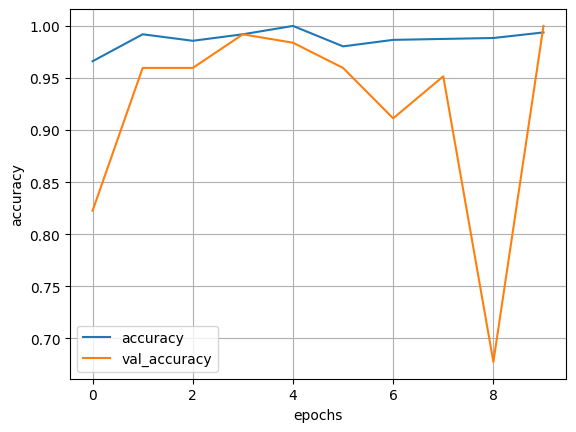

In [9]:
#Visualize accuracy

import pandas as pd

progress = {k:v for k,v in history1_FT.history.items() if k in ['accuracy', 'val_accuracy']}

pd.DataFrame(progress).plot()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

##Evaluate the Fine-tuned model

In [10]:
testLoss1_FT, testAccuracy1_FT = model1_FT.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss1_FT, testAccuracy1_FT))

13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.9977 - loss: 0.0382
Test-loss: 0.047461, Test-accuracy: 0.995192


##Update model using the best weights

In [11]:
model1_FT.load_weights("best_xception_FT.weights.h5")

testLoss1_FT, testAccuracy1_FT = model1_FT.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss1_FT, testAccuracy1_FT))

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.9977 - loss: 0.0382
Test-loss: 0.047461, Test-accuracy: 0.995192


##Check model performance

In [12]:
y_prob = model1_FT.predict(X_test_std)
y_predict = np.argmax(y_prob, axis=-1)
print(y_predict)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step
[1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 2 1 0 1 0 0 0 0 1 1 1 0 0 2 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 2 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 2 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 0 2 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 2 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 2 2 1 1 1 1 0
 0 2 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 2 1 2 0 0 0 0 1 0 1 0 0 0 1 1 2
 1 0 1 1 1 1 0 0 1 0 1 2 0 2 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 2 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 1 0 2 1 0 1 0 0]


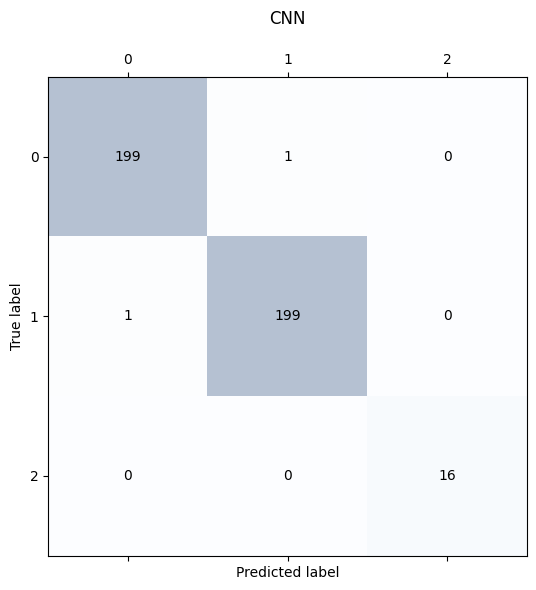

In [13]:
#confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig("ConfusionMatrix_Xception_FT.png", dpi=300, format='png', pad_inches=0.3)
plt.show()


In [14]:
#classification scores

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  0.9951923076923077
Recall:  0.9951923076923077
F1-score:  0.9951923076923077


##Save the fine tuned model

In [15]:
model1_FT.save('/content/gdrive/MyDrive/DL/Xception_Best_Model_FT.h5')